In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [61]:
start = '2011-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start,end)#taking value from yahoo finance website
df.head()#printing head part


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864280
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078653
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131254
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214130
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205874


In [62]:
df.tail()#printing tail part

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [63]:
df=df.reset_index()#resetting date as my index
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864280
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078653
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131254
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214130
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205874


In [64]:
df=df.drop(['Date','Adj Close'], axis=1)#removing columns that are not necessary
df.head()

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0


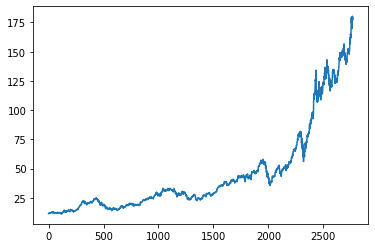

In [65]:
plt.plot(df.Close) #"to produce a simple graph showing closing price of tesla stock"

In [66]:
df

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0
...,...,...,...,...,...
2765,180.419998,177.070007,177.089996,180.330002,74919600.0
2766,181.330002,178.529999,180.160004,179.289993,79144300.0
2767,180.630005,178.139999,179.330002,179.380005,62348900.0
2768,180.570007,178.089996,179.470001,178.199997,59773000.0


In [67]:
ma100=df.Close.rolling(100).mean() #"moving average of 100 days it will take 100 days closing price and it will find average"
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2765    153.3444
2766    153.6667
2767    153.9991
2768    154.3202
2769    154.6399
Name: Close, Length: 2770, dtype: float64

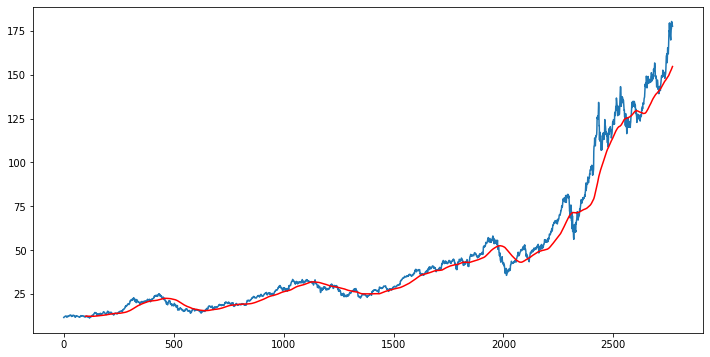

In [68]:
plt.figure(figsize=(12,6))
plt.plot(df.Close) 
plt.plot(ma100,'r') #"ma100 in red colour"

In [69]:
ma200=df.Close.rolling(200).mean() #"moving average of 200 days"
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2765    142.85570
2766    143.13220
2767    143.40125
2768    143.66845
2769    143.95365
Name: Close, Length: 2770, dtype: float64

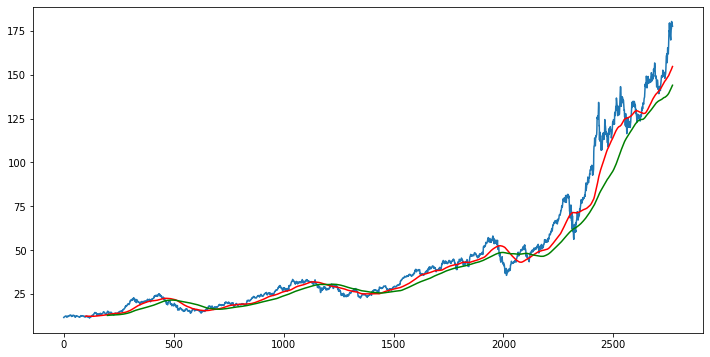

In [70]:
plt.figure(figsize=(12,6))
plt.plot(df.Close) 
plt.plot(ma100,'r') #"ma100 in red colour"
plt.plot(ma200,'g') #"ma200 in green colour"

In [71]:
df.shape #"to know number of rows and columns that we have till now"

(2770, 5)

In [72]:
# for data predictions now we will split data into training and testing and create a dataframe for both

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) #we take only 70% values of close column  
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])#we take remaining 30% values of close column 

print(data_training.shape)

print(data_testing.shape) # addition of both values will be equal to df.shape

(1938, 1)
(832, 1)


In [73]:
data_training.head()

,Close
0,11.520000
1,11.770357
2,11.831786
3,11.928571
4,11.918929


In [74]:
data_testing.head()

,Close
1938,56.602501
1939,55.959999
1940,54.470001
1941,54.560001
1942,54.592499


In [100]:
from sklearn.preprocessing import MinMaxScaler #to ocnvert datas into scaled data
scaler=MinMaxScaler(feature_range=(0,1))# each value of closing price will be scaled between 0 and 1

In [76]:
data_training_array=scaler.fit_transform(data_training)#converts values to array
data_training_array

array([[0.00564215],
       [0.01110504],
       [0.01244545],
       ...,
       [0.94528523],
       [0.97539747],
       [0.96023227]])

In [77]:
data_training_array.shape

(1938, 1)

In [78]:
x_train=[] #100 days are going to be x train example of 10 days
y_train=[] #101th day is going to be y train
#as closing price of last day will be dependent on values of previous days

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
x_train, y_train=np.array(x_train),np.array(y_train) #converting x train and y train into numpy arrays so that we can provide data to LSTM
    
   

In [79]:
x_train.shape

(1838, 100, 1)

In [80]:
#now we make Machine learnong model

In [81]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [82]:
model = Sequential() #we have four layers in our LSTM model
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1))) #we are working only with 1 close columnn so it is 1 in second argument
model.add(Dropout(0.2))



model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))# Dense layer to connect all these layers


In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [84]:
model.compile(optimizer='adam',loss='mean_squared_error')# we are doing time series analysis so we use mean squared error
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 19s 220ms/step - loss: 0.0312
Epoch 2/50
58/58 [==============================] - 13s 217ms/step - loss: 0.0063
Epoch 3/50
58/58 [==============================] - 13s 216ms/step - loss: 0.0054
Epoch 4/50
58/58 [==============================] - 13s 216ms/step - loss: 0.0044
Epoch 5/50
58/58 [==============================] - 12s 214ms/step - loss: 0.0045
Epoch 6/50
58/58 [==============================] - 13s 221ms/step - loss: 0.0043
Epoch 7/50
58/58 [==============================] - 13s 217ms/step - loss: 0.0040
Epoch 8/50
58/58 [==============================] - 13s 228ms/step - loss: 0.0041
Epoch 9/50
58/58 [==============================] - 13s 218ms/step - loss: 0.0036
Epoch 10/50
58/58 [==============================] - 13s 218ms/step - loss: 0.0040
Epoch 11/50
58/58 [==============================] - 13s 218ms/step - loss: 0.0037
Epoch 12/50
58/58 [==============================] - 13s 220ms/step - loss: 0.0038
Epoch 13/50
5

In [85]:
model.save('keras_model.h5')

In [86]:
#Now we are predicting the data,we take value from testing data and last 100 values from training data
data_testing.head()

,Close
1938,56.602501
1939,55.959999
1940,54.470001
1941,54.560001
1942,54.592499


In [87]:
data_training.tail(100)

,Close
1838,41.310001
1839,40.735001
1840,40.912498
1841,41.055000
1842,40.580002
...,...
1933,55.775002
1934,55.325001
1935,54.582500
1936,55.962502


In [88]:
past_100_days=data_training.tail(100)

In [89]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\srijan saxena\AppData\Local\Temp\ipykernel_9296\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [90]:
final_df.head()#rows are not scaled

,Close
0,41.310001
1,40.735001
2,40.912498
3,41.055000
4,40.580002


In [91]:
input_data=scaler.fit_transform(final_df)#we scale the rows between 0 and 1
input_data

array([[0.03980109],
       [0.03582961],
       [0.03705557],
       [0.03803982],
       [0.03475904],
       [0.0398356 ],
       [0.04646626],
       [0.05936492],
       [0.05991746],
       [0.07190095],
       [0.0741975 ],
       [0.07573429],
       [0.0779963 ],
       [0.08262392],
       [0.08012017],
       [0.0793604 ],
       [0.07640771],
       [0.0794122 ],
       [0.07735742],
       [0.07618323],
       [0.07846252],
       [0.07765096],
       [0.07972303],
       [0.0793604 ],
       [0.08010291],
       [0.07892872],
       [0.07823804],
       [0.07715019],
       [0.08296929],
       [0.08571478],
       [0.08827033],
       [0.08942723],
       [0.08852935],
       [0.08549029],
       [0.08467873],
       [0.0864918 ],
       [0.08376357],
       [0.08393625],
       [0.08055185],
       [0.08037919],
       [0.07511267],
       [0.07651131],
       [0.07471553],
       [0.07378308],
       [0.06903458],
       [0.07293697],
       [0.07247078],
       [0.074

In [92]:
input_data.shape

(932, 1)

In [93]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(832, 100, 1)
(832,)


In [94]:
#Making predictions

y_predicted=model.predict(x_test)
y_predicted.shape

(832, 1)

In [95]:
y_test

array([0.14542503, 0.14098733, 0.13069605, 0.13131767, 0.13154213,
       0.1344085 , 0.13031616, 0.13572081, 0.13813824, 0.13508192,
       0.142904  , 0.14426813, 0.14689274, 0.15038074, 0.15519832,
       0.14815327, 0.14176435, 0.14086647, 0.14621932, 0.12807141,
       0.12477336, 0.1380001 , 0.12979814, 0.13806916, 0.13641151,
       0.12748433, 0.13316526, 0.13547906, 0.13907066, 0.12587846,
       0.13401136, 0.12796781, 0.1209573 , 0.12278763, 0.13238823,
       0.13819004, 0.11273806, 0.10256763, 0.10633191, 0.11700308,
       0.11448207, 0.10754062, 0.08975531, 0.08640546, 0.07702934,
       0.08498955, 0.08865021, 0.07540621, 0.06007286, 0.05972752,
       0.0519745 , 0.05599778, 0.05534164, 0.06691071, 0.06451056,
       0.06283563, 0.07361042, 0.05957212, 0.05617046, 0.04541295,
       0.04732962, 0.04565469, 0.04646626, 0.04966069, 0.04021548,
       0.03755633, 0.04123427, 0.03228981, 0.0252793 , 0.01474625,
       0.00801202, 0.02586638, 0.02410511, 0.02424325, 0.02685

In [96]:
y_predicted

array([[0.17369927],
       [0.17416471],
       [0.17436022],
       [0.174256  ],
       [0.1738276 ],
       [0.17308596],
       [0.17210662],
       [0.17094436],
       [0.1697186 ],
       [0.16857198],
       [0.16758567],
       [0.1668857 ],
       [0.16657045],
       [0.1667074 ],
       [0.16734001],
       [0.16849677],
       [0.17007457],
       [0.17184836],
       [0.17359048],
       [0.17517011],
       [0.17635259],
       [0.17693982],
       [0.1769338 ],
       [0.17634672],
       [0.17532414],
       [0.17403267],
       [0.17253938],
       [0.17095624],
       [0.16941705],
       [0.16807342],
       [0.16689466],
       [0.16590343],
       [0.16505302],
       [0.16422123],
       [0.16332778],
       [0.16243882],
       [0.16170809],
       [0.16100635],
       [0.1601114 ],
       [0.15888846],
       [0.15738904],
       [0.15570441],
       [0.15387686],
       [0.15181313],
       [0.1494337 ],
       [0.1466613 ],
       [0.14356403],
       [0.140

In [97]:
scaler.scale_

array([0.00690691])

In [98]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

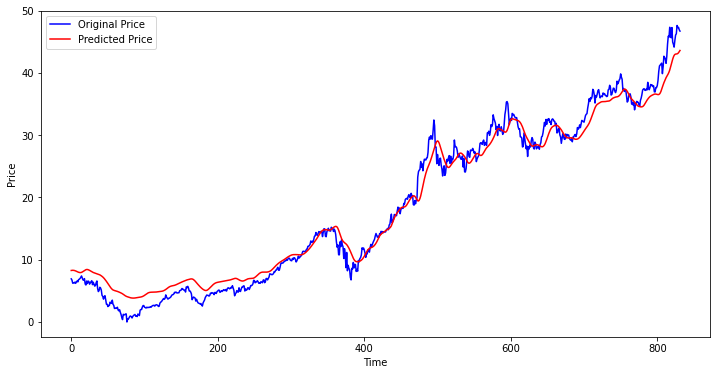

In [99]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label= 'Original Price')
plt.plot(y_predicted,'r',label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()